## **Writing code structure using Keras**

Epoch 1/100


c:\DataScience_Bootcamp\chandan\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5307 - mae: 0.5050 - val_loss: 0.4148 - val_mae: 0.4516
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3661 - mae: 0.4305 - val_loss: 0.3643 - val_mae: 0.4198
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3522 - mae: 0.4162 - val_loss: 0.3513 - val_mae: 0.4132
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3408 - mae: 0.4076 - val_loss: 0.3574 - val_mae: 0.4081
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3236 - mae: 0.3969 - val_loss: 0.3445 - val_mae: 0.4098
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3173 - mae: 0.3898 - val_loss: 0.4045 - val_mae: 0.4210
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3170 - mae: 0.3907 - val_loss: 0.3314 - val_mae: 0.4074
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3041 - mae: 0.3821 - val_loss: 0.3123 - val_mae: 0.3832
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

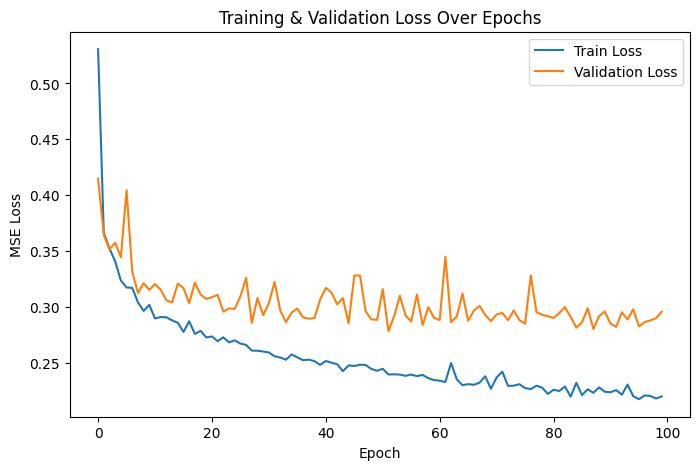

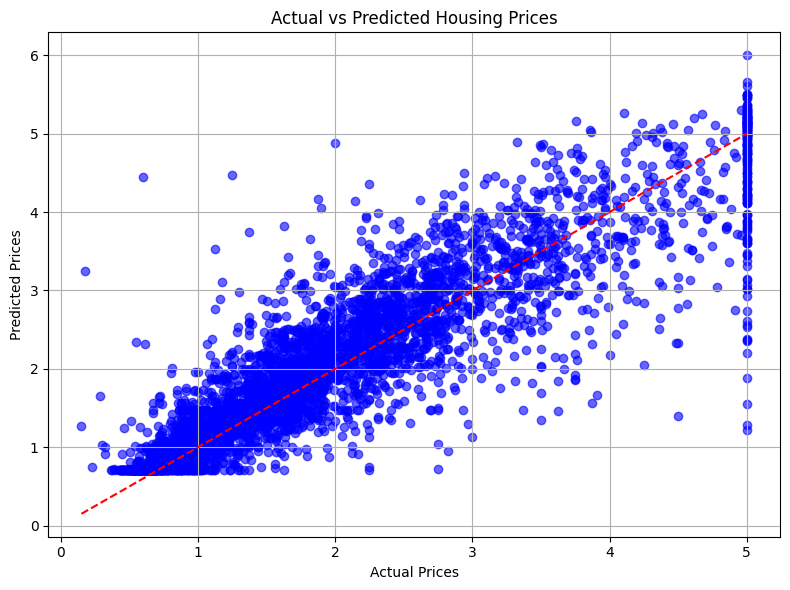


Sample Predictions vs Actual Values:
Predicted: 0.70, Actual: 0.48
Predicted: 1.24, Actual: 0.46
Predicted: 5.17, Actual: 5.00
Predicted: 2.90, Actual: 2.19
Predicted: 2.63, Actual: 2.78


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=1)

# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)

print(f"\nTest MSE Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R2 Score: {r2:.4f}")

# Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some sample predictions
print("\nSample Predictions vs Actual Values:")
for pred, actual in zip(y_pred[:5], y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

## **Writing code structure with Reuseability**

c:\DataScience_Bootcamp\chandan\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6603 - mae: 0.5370 - val_loss: 0.3985 - val_mae: 0.4468
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3858 - mae: 0.4335 - val_loss: 0.4236 - val_mae: 0.4650
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3483 - mae: 0.4146 - val_loss: 0.3753 - val_mae: 0.4320
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3347 - mae: 0.4043 - val_loss: 0.3496 - val_mae: 0.4009
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3488 - mae: 0.3963 - val_loss: 0.3700 - val_mae: 0.4355
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3116 - mae: 0.3871 - val_loss: 0.3368 - val_mae: 0.4004
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3121 - mae: 0.3850 - val_loss: 0.3437 - val_mae: 0.4095
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3040 - mae: 0.3840 - val_loss: 0.3322 - val_mae: 0.4005
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/

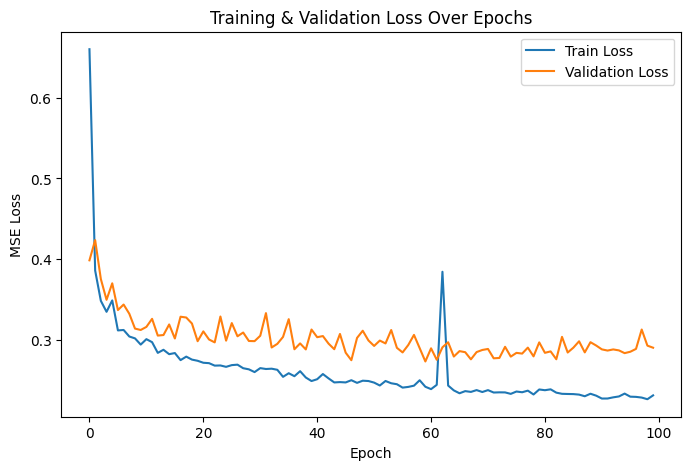

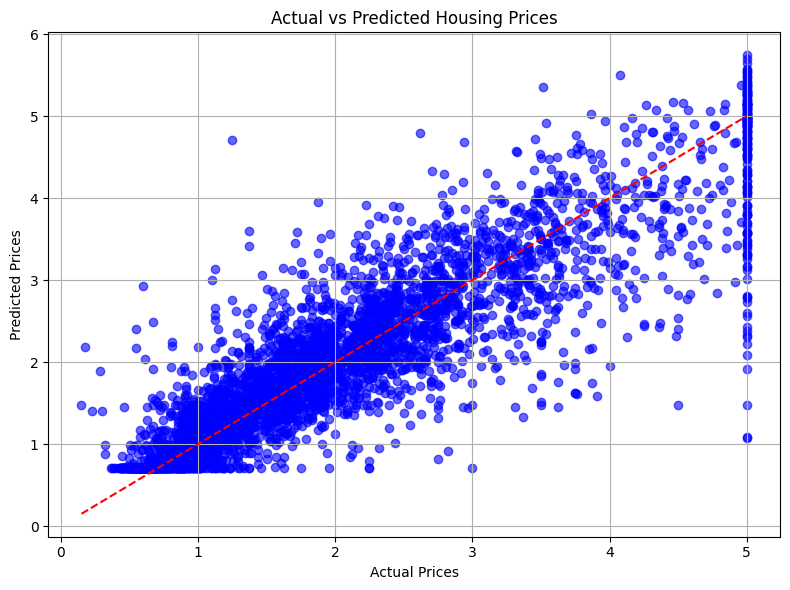


Sample Predictions vs Actual Values:
Predicted: 0.71, Actual: 0.48
Predicted: 1.46, Actual: 0.46
Predicted: 5.03, Actual: 5.00
Predicted: 2.66, Actual: 2.19
Predicted: 3.00, Actual: 2.78


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Data loading and preprocessing
def load_data(test_size=0.2, random_state=42):
    data = fetch_california_housing()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# 2. Model builder function
def build_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
    return model

# 3. Training function
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.2, verbose=1)
    return history

# 4. Evaluation function
def evaluate_model(model, X_test, y_test):
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    return test_loss, test_mae, r2, y_pred

# 5. Plotting functions
def plot_training_loss(history):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title('Training & Validation Loss Over Epochs')
    plt.legend()
    plt.show()

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Housing Prices')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 6. Main function to orchestrate everything
def main():
    # Load data
    X_train, X_test, y_train, y_test = load_data()

    # Build model
    model = build_model(X_train.shape[1])

    # Train model
    history = train_model(model, X_train, y_train, epochs=100, batch_size=32)

    # Evaluate model
    test_loss, test_mae, r2, y_pred = evaluate_model(model, X_test, y_test)
    print(f"\nTest MSE Loss: {test_loss:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Test R2 Score: {r2:.4f}")

    # Plot results
    plot_training_loss(history)
    plot_actual_vs_predicted(y_test, y_pred)

    # Print sample predictions
    print("\nSample Predictions vs Actual Values:")
    for pred, actual in zip(y_pred[:5], y_test[:5]):
        print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

if __name__ == "__main__":
    main()
